# Import the libraries and a sample data.

In [1]:
from gamma_spectrograph import get_matched_peaks_data
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

df = pd.read_csv("Cs-137.csv")
x = df.channels.values
y = df.counts.values


C:\Users\User\anaconda3\envs\gpu\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


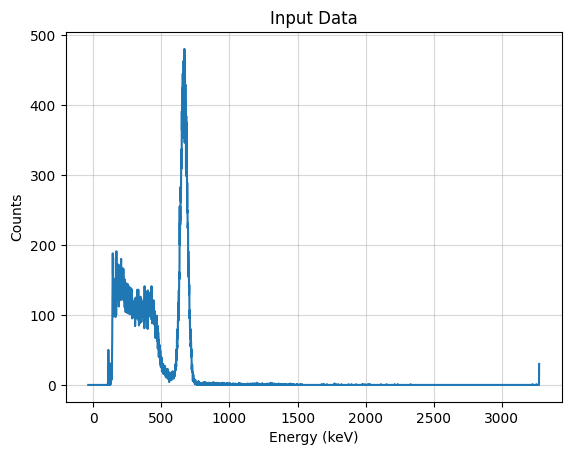

In [2]:
plt.plot(x, y)
plt.grid(alpha=0.5)
plt.title("Input Data")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.show()

# Run the algorithm

In [3]:

detected_parameter_dict, filtered_y_peak_max, x, y, matching_idx_list  = get_matched_peaks_data(x, y, tolerance = 43, window_size=70, 
                           confidence=5, FWHM=30, 
                           intensity_threshold=0.01, z=6,
                          r2_threshold = 0.75)#, matching_isotope_AEP


detected_parameter_dict

{'Isotope': [['Cs-137']],
 'Peak': [[667.3935790178355]],
 'R2': [[0.9674099550323706]],
 'FWHM': [[9.50434230224321]]}

# Plot the results

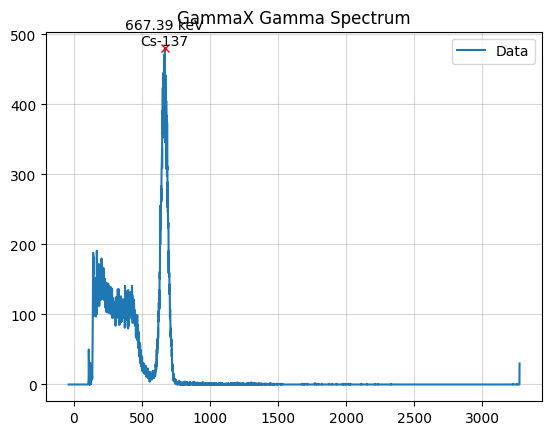

In [4]:
def plot_with_text(x, y, matching_idx_list, detected_parameter_dict, filtered_y_peak_max):
    # Create a new figure and axes
    fig, ax = plt.subplots()
    
    # Plot the overall data and mark the matching indices
    ax.plot(x, y, label='Data')
    ax.plot(x[matching_idx_list], y[matching_idx_list], "x", color="red")
    
    # Loop over detected parameters and insert text annotations
    for idx in range(len(detected_parameter_dict["Peak"])):
        # Extract the inner float value from each nested list
        peak_val = detected_parameter_dict["Peak"][idx][0]
        isotope_val = detected_parameter_dict["Isotope"][idx][0]
        
        # Ensure the filtered_y_peak_max value is a float (if it's a list, extract its first element)
        y_val = filtered_y_peak_max[idx][0] if isinstance(filtered_y_peak_max[idx], list) else filtered_y_peak_max[idx]
        
        ax.text(
            peak_val, 
            y_val,
            f'{peak_val:.2f} keV\n{isotope_val}',
            ha='center',
            va='bottom'
        )
    
    # Configure plot appearance
    ax.set_title("GammaX Gamma Spectrum")
    ax.legend()
    ax.grid(alpha=0.5)
    
    # Display the plot
    plt.show()

# plot the results
plot_with_text(x, y, matching_idx_list, detected_parameter_dict, filtered_y_peak_max)
